In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
def Lorenz63(t, y, sigma=10, beta=8/3, rho=14):
    X, Y, Z = y[0], y[1], y[2]
    dXdt = -sigma*X + sigma*Y
    dYdt = -X*Z + rho*X - Y
    dZdt = X*Y - beta*Z
    return([dXdt, dYdt, dZdt])

In [3]:
t_span = [0,25]
Y_0 = [-10,10,30]

sol14 = solve_ivp(Lorenz63, t_span, Y_0, t_eval=np.linspace(t_span[0], t_span[1], 10000))

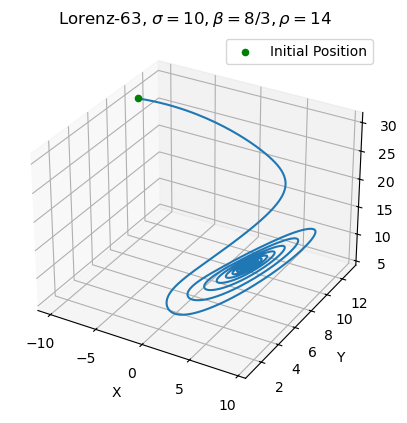

In [4]:
fig14 = plt.figure()
ax14 = plt.subplot(projection='3d')
ax14.set_title("Lorenz-63, " r"$\sigma=10, \beta=8/3, \rho=14$")
ax14.set_xlabel("X")
ax14.set_ylabel("Y")
ax14.set_zlabel("Z")
ax14.scatter(*Y_0, c="g", label="Initial Position")
ax14.plot(*sol14.y)
ax14.legend()
fig14.savefig("Lorenz63_14", dpi=300, bbox_inches="tight")

In [8]:
n = 15
noises = np.random.multivariate_normal([0,0,0], np.diag([0.1]*3), n)
Ys_perturb = noises + Y_0

In [9]:
Ys_t2 = np.full(Ys_perturb.shape, np.nan)
for ii in np.arange(n):
    sol_p = solve_ivp(Lorenz63, [0,2], Ys_perturb[ii,:], args=(10,8/3,28))
    Ys_t2[ii,:] = sol_p.y[:,-1]

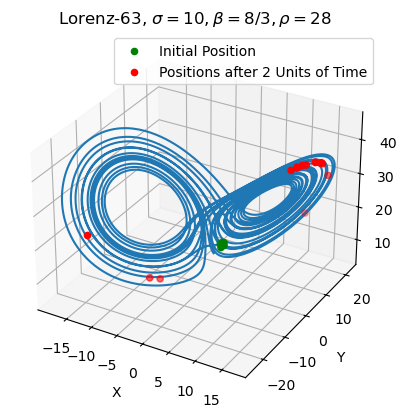

In [10]:
Y_0 = [5,-5,20]
sol28 = solve_ivp(Lorenz63, t_span, Y_0, t_eval=np.linspace(t_span[0], t_span[1], 10000), args=(10,8/3,28))

fig28 = plt.figure()
ax28 = plt.subplot(projection='3d')
ax28.set_title("Lorenz-63, " r"$\sigma=10, \beta=8/3, \rho=28$")
ax28.set_xlabel("X")
ax28.set_ylabel("Y")
ax28.set_zlabel("Z")
ax28.scatter(*Y_0, c="g", label="Initial Position")
ax28.plot(*sol28.y)
ax28.scatter(*Ys_perturb.T, c="g")
ax28.scatter(*Ys_t2.T, c="r", label="Positions after 2 Units of Time")
ax28.legend()
fig28.savefig("Lorenz63_28", dpi=300, bbox_inches="tight")
# Maybe different from the book since the particles are randomly generated, can fix a seed.